In [1]:
# 1) Data Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
# Separate features and target
X = df.iloc[:, :-1].values  # all columns except last (Profit)
y = df.iloc[:, -1].values   # last column (Profit)
print('\nFeature preview (first 5 rows):')
print(X[:5])


Feature preview (first 5 rows):
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]


In [5]:
# Encode categorical 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_encoded = ct.fit_transform(X)

In [6]:
# Convert to numpy array and inspect
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])


After OneHotEncoding, feature shape: (50, 6)

First 5 rows after encoding:
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


In [7]:
# 2) Fit Model
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

Training samples: 40
Test samples: 10


In [8]:
# Train the Multiple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Intercept: 42467.52924853696
Number of coefficients: 6


In [9]:
# 3) Predict
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual Profit,Predicted Profit
0,103282.38,103015.20
1,144259.40,132582.28
2,146121.95,132447.74
3,77798.83,71976.10
4,191050.39,178537.48
5,105008.31,116161.24
6,81229.06,67851.69
7,97483.56,98791.73
8,110352.25,113969.44
9,166187.94,167921.07


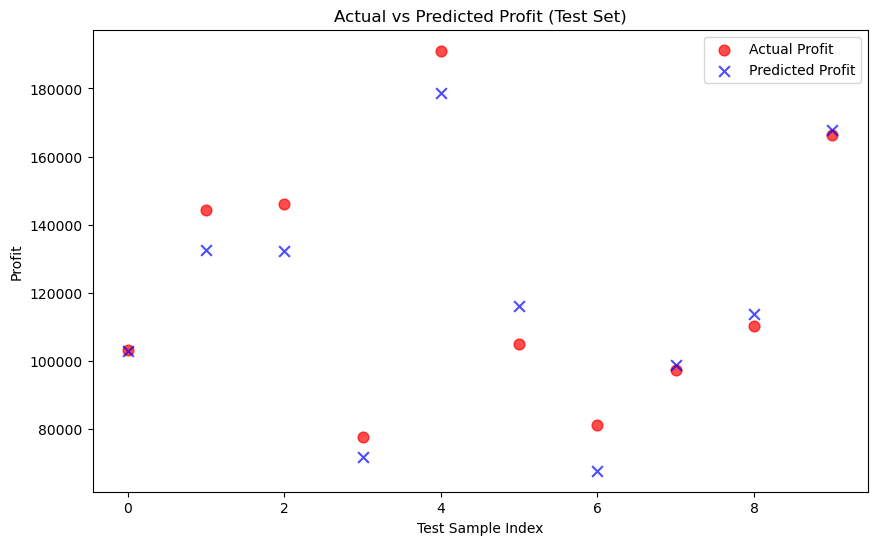

In [10]:
# 4) Visualization
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()

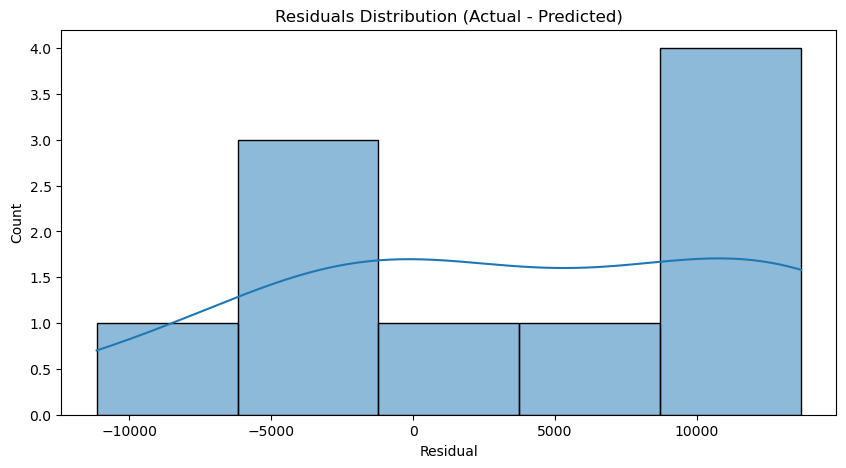

In [11]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()

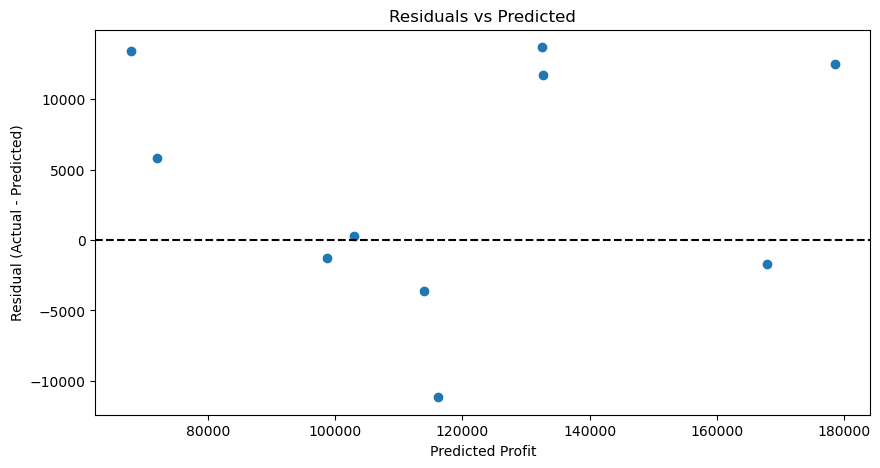

In [12]:
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

In [13]:
# Evaluation metrics & sample prediction
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 83502864.03
R^2 Score: 0.9347


In [14]:
# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
raw_sample = np.array([[160000, 130000, 300000, 'California']])
encoded_sample = ct.transform(raw_sample)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample startup predicted profit:', float(pred_sample[0]))


Sample startup predicted profit: 181566.92389384337
